# Indian Loksabha elections data(1962-2019) Analysis

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
ind = pd.read_csv(r"C:\Users\akash\Documents\dataset\kaggle dataset\Loksabha_1962-2019\Loksabha_1962-2019 .csv")
ind

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,"4,04,283","2,20,383",54.5 %,"89,085",40.40%,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,"4,19,077","2,52,379",60.2 %,"33,022",13.10%,1962.0
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,"4,33,164","2,75,663",63.6 %,"54,351",19.70%,1962.0
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,"4,33,392","2,70,346",62.4 %,"21,592",8.00%,1962.0
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,"4,03,913","2,22,091",55.0 %,"14,038",6.30%,1962.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8042,Wardha,8,GEN,Maharashtra,Ramdas Chandrabhanji Tadas,Bharatiya Janta Party,"16,79,788","10,72,570",64.2 %,"1,87,191",17.50%,2019.0
8043,Wayanad,4,GEN,Kerala,Rahul Gandhi,Indian National Congress,"13,06,141","10,92,197",83.8 %,"4,31,770",39.50%,2019.0
8044,West Delhi,6,GEN,Delhi [1977 Onwards],Sant Prasad Sinha,Bharatiya Janta Party,"20,39,410","14,41,601",71.1 %,"5,78,486",40.10%,2019.0
8045,Yavatmal-Washi,14,GEN,Maharashtra,Bhavana Pundlikrao Gawali,Shiv Sena,"18,12,059","11,74,220",65.0 %,"1,17,939",10.00%,2019.0


In [34]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pc_name         8047 non-null   object 
 1   no              8047 non-null   object 
 2   type            8015 non-null   object 
 3   state           8047 non-null   object 
 4   candidate_name  8047 non-null   object 
 5   party           8047 non-null   object 
 6   electors        8047 non-null   object 
 7   votes           8047 non-null   object 
 8   Turnout         8033 non-null   object 
 9   margin          8047 non-null   object 
 10  margin%         8032 non-null   object 
 11  year            8046 non-null   float64
dtypes: float64(1), object(11)
memory usage: 754.5+ KB


In [35]:
ind.isnull().sum()

Pc_name            0
no                 0
type              32
state              0
candidate_name     0
party              0
electors           0
votes              0
Turnout           14
margin             0
margin%           15
year               1
dtype: int64

In [36]:
ind['Turnout'] = pd.to_numeric(ind['Turnout'].str.replace('%', ''), errors='coerce')
ind['Turnout'].fillna(ind['Turnout'].mean(), inplace=True)

In [37]:
ind['margin%'] = pd.to_numeric(ind['margin%'].str.replace('%', ''), errors='coerce')
ind['margin%'].fillna(ind['margin%'].mean(), inplace=True)

In [38]:
ind['type'].fillna(ind['type'].mode(), inplace=True)
ind.dropna(subset=['year'],inplace=True)

In [39]:
ind.head(2)

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,"4,04,283","2,20,383",54.5,"89,085",40.4,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,"4,19,077","2,52,379",60.2,"33,022",13.1,1962.0


In [40]:
ind['type'].value_counts()

type
GEN     6124
SC      1241
ST       647
GENP       2
Name: count, dtype: int64

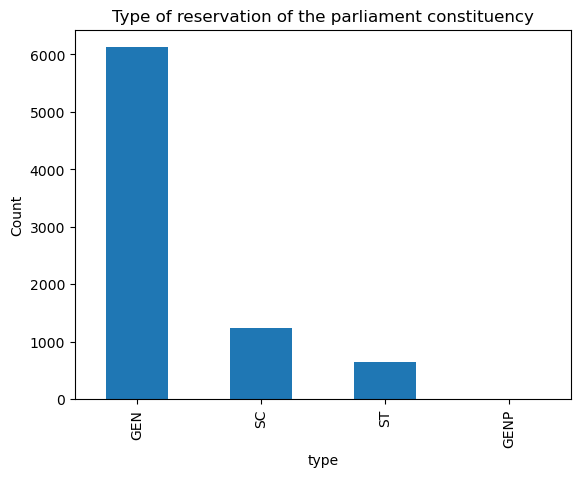

In [108]:
ind['type'].value_counts().plot.bar()
plt.title('Type of reservation of the parliament constituency')
plt.ylabel('Count')
plt.show()

- GEN have the largest number of reservation seats in  the parliament constituency, They have 6124 seats
- SC have second most  reservation , that is 1241 . And ST have 647 and 2 for GENP

In [109]:
total =ind['type'].value_counts().sum()
total_gen= ind['type'].value_counts().get('GEN')
total_sc = ind['type'].value_counts().get('SC')
total_st = ind['type'].value_counts().get('ST')
gen_per = (total_gen/total)*100
sc_per = (total_sc/total)*100
st_per = (total_st/total)*100
print(f'GEN Reservation {gen_per} % ')
print(f'SC Reservation {sc_per} %  ')
print(f'ST Reservation {st_per} % ')

GEN Reservation 76.41627152483154 % 
SC Reservation 15.485400549039182 %  
ST Reservation 8.073371599700524 % 


- GEN have 76.41627152483154 % seat Reservation
- SC have 15.485400549039182 % seat Reservation
- ST have 8.073371599700524 % seat Reservation

In [136]:
ind['candidate_name'].value_counts()

candidate_name
Data Not Available            39
Atal Bihari Vajpayee          10
Kamal Nath                    10
Mulayam Singh Yadav            9
Somnath Chatterjee             9
                              ..
Mani K.B.S.                    1
K. Rajamallu                   1
Amarender Singh                1
Parmar Hiralal Ranchhoddas     1
B.B.Patil                      1
Name: count, Length: 6187, dtype: int64

In [41]:
most_cand=ind[ind['candidate_name'] == 'Atal Bihari Vajpayee']
most_cand

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
1211,Gwalior,169,GEN,Madhya Pradesh [1947 - 1999],Atal Bihari Vajpayee,Bhartiya Jan Sangh,"5,68,108","3,31,716",58.4,"70,310",21.2,1971.0
1919,New Delhi,1,GEN,Delhi [1977 Onwards],Atal Bihari Vajpayee,Bharatiya Lok Dal,"2,70,702","1,78,112",65.8,"77,186",43.3,1977.0
2462,New Delhi,1,GEN,Delhi [1977 Onwards],Atal Bihari Vajpayee,Janta Party,"3,01,071","1,96,112",65.1,"5,045",2.6,1980.0
4023,Lucknow,20,GEN,Uttar Pradesh [1947 - 1999],Atal Bihari Vajpayee,Bharatiya Janta Party,"11,88,127","3,94,817",33.2,"1,17,303",29.7,1991.0
4240,Vidisha,31,GEN,Madhya Pradesh [1947 - 1999],Atal Bihari Vajpayee,Bharatiya Janta Party,"9,44,772","4,82,893",51.1,"1,04,134",21.6,1991.0
4433,Gandhinagar,11,GEN,Gujarat,Atal Bihari Vajpayee,Bharatiya Janta Party,"17,52,944","4,98,010",28.4,"1,88,872",37.9,1996.0
4560,Lucknow,20,GEN,Uttar Pradesh [1947 - 1999],Atal Bihari Vajpayee,Bharatiya Janta Party,"14,88,169","7,69,886",51.7,"1,18,671",15.4,1996.0
5103,Lucknow,20,GEN,Uttar Pradesh [1947 - 1999],Atal Bihari Vajpayee,Bharatiya Janta Party,"15,12,907","7,53,528",49.8,"2,16,263",28.7,1998.0
5646,Lucknow,20,GEN,Uttar Pradesh [1947 - 1999],Atal Bihari Vajpayee,Bharatiya Janta Party,"15,52,441","7,53,961",48.6,"1,23,624",16.4,1999.0
6189,Lucknow,16,SC,Uttar Pradesh [2000 Onwards],Atal Bihari Vajpayee,Bharatiya Janta Party,"16,39,922","5,78,501",35.3,"2,18,375",37.7,2004.0


In [42]:
most_cand['votes'] = most_cand['votes'].str.replace(',', '')
most_cand['votes'] = most_cand['votes'].str.extract(r'(\d+)').astype(float) 

C:\Users\akash\AppData\Local\Temp\ipykernel_8196\569600911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_cand['votes'] = most_cand['votes'].str.replace(',', '')
C:\Users\akash\AppData\Local\Temp\ipykernel_8196\569600911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_cand['votes'] = most_cand['votes'].str.extract(r'(\d+)').astype(float)


In [159]:
most_cand.groupby('year')['votes'].sum()

year
1971.0     331716.0
1977.0     178112.0
1980.0     196112.0
1991.0     877710.0
1996.0    1267896.0
1998.0     753528.0
1999.0     753961.0
2004.0     578501.0
Name: votes, dtype: float64

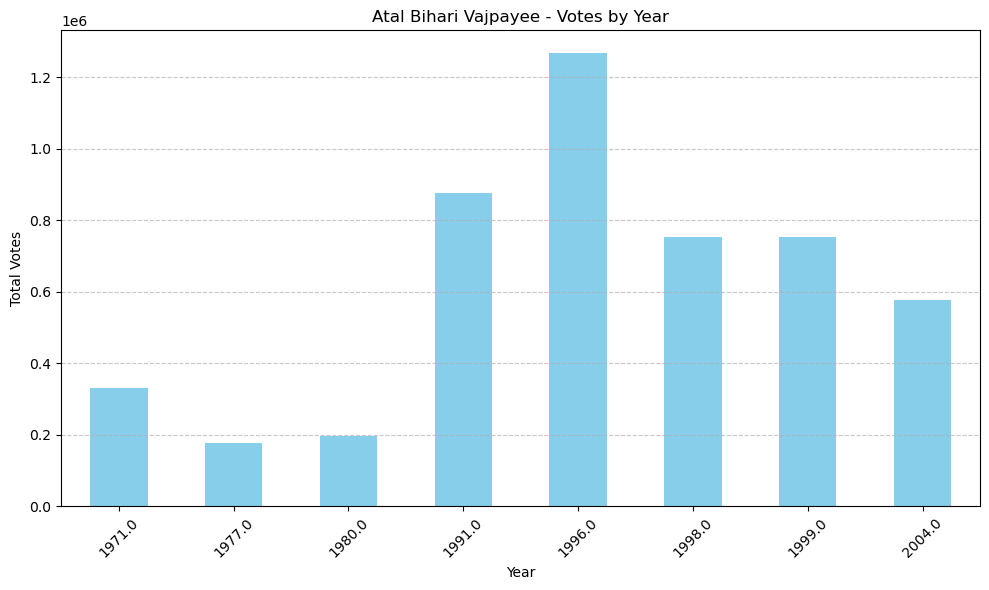

In [43]:
votesBy_year = most_cand.groupby('year')['votes'].sum()

plt.figure(figsize=(10, 6))
votesBy_year.plot(kind='bar', color='skyblue')
plt.title('Atal Bihari Vajpayee - Votes by Year')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [143]:
most_cand['year'].unique()

array([1971., 1977., 1980., 1991., 1996., 1998., 1999., 2004.])

In [141]:
most_cand['margin%'].max()

43.3

In [164]:
most_cand['party'].value_counts()

party
Bharatiya Janta Party    7
Bhartiya Jan Sangh       1
Bharatiya Lok Dal        1
Janta Party              1
Name: count, dtype: int64

- Atal Bihari Vajpayee is the most nominated candidate in indian parliament constituency
- He nominated in different constituency,they are Gwalior,new Delhi,lucknow,vidisha,Gandhinagar and lucknow.
- He is the part odf election in 1971,1977,1980,1991,1996,1998,1999,2004
- Most of the time he nominated in general catogery
- his highest win margin is 43.3%
- In the year 1996 Atal Bihari Vajpayee got higher number of votes and less in 1977
- 7 times he was the candidate of Bharatiya Janta Party and each one time candidate of Bhartiya Jan Sangh,Bharatiya Lok Dal and Janta Party.  

In [190]:
ind['party'].value_counts().head(10)

party
Indian National Congress              2848
Bharatiya Janta Party                 1570
Communist Party Of India (MARXIST)     358
Indian National Congress (I)           353
Bharatiya Lok Dal                      295
Janata Dal                             254
Dravida Munetra Kazhagam               167
Communist Party Of India               166
Independent                            155
Samajwadi Party                        132
Name: count, dtype: int64

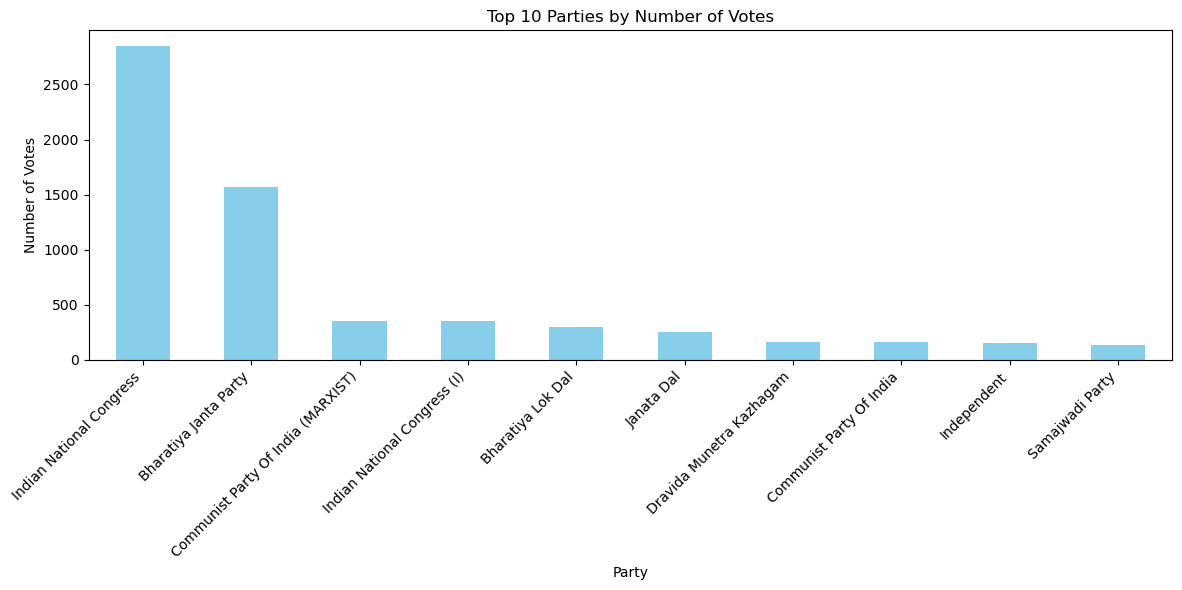

In [189]:
top_parties = ind['party'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_parties.plot(kind='bar', color='skyblue')
plt.title('Top 10 Parties by Number of Votes')
plt.xlabel('Party')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The Top party are 
Indian National Congress,
Bharatiya Janta Party ,
Communist Party Of India (MARXIST),
Indian National Congress (I),
Bharatiya Lok Dal,
Janata Dal,
Dravida Munetra Kazhagam,
Communist Party Of India ,
Independent and
Samajwadi Party  

In [165]:
ind['party'].value_counts()

party
Indian National Congress              2848
Bharatiya Janta Party                 1570
Communist Party Of India (MARXIST)     358
Indian National Congress (I)           353
Bharatiya Lok Dal                      295
                                      ... 
Himachal Vikash Congress                 1
United Democratic Front                  1
Bharatiya Navshakti Party                1
Karnataka Congress Party                 1
Sikkim Krantikari Morcha                 1
Name: count, Length: 148, dtype: int64

Text(0, 0.5, '')

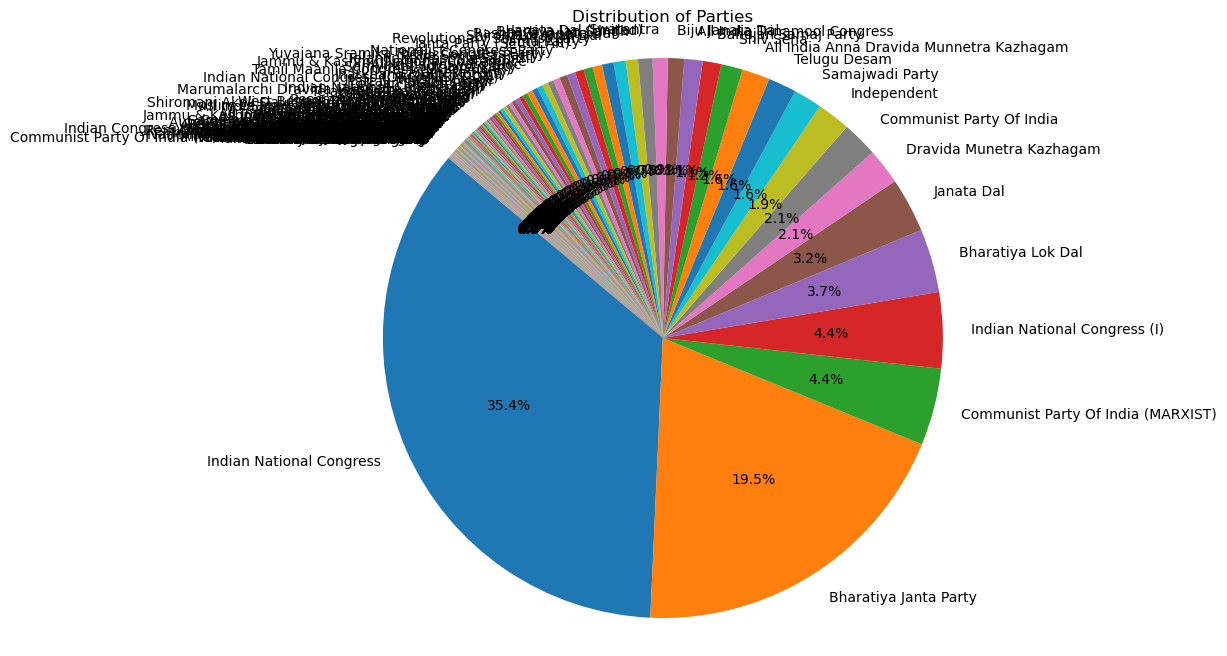

In [169]:
party_counts = ind['party'].value_counts()
plt.figure(figsize=(10, 8))
party_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Parties')
plt.axis('equal') 
plt.ylabel('')  

- In the history of indian Loksabha election Indian National Congressis the party who got the most seats from 1962 to 2019. The got 2848 seats.
- Bharatiya Janta Party are in second place with 1570 seats.
- INC have 35.4% in seats while BJP have 19.5%

In [170]:
ind['state'].value_counts()

state
Uttar Pradesh [1947 - 1999]                936
Maharashtra                                710
West Bengal                                620
Bihar [1947 - 1999]                        591
Andhra Pradesh                             545
Tamil Nadu                                 506
Madhya Pradesh [1947 - 1999]               430
Gujarat                                    382
Rajasthan                                  368
Karnataka                                  336
Uttar Pradesh [2000 Onwards]               320
Orissa                                     312
Kerala                                     296
Assam                                      207
Punjab                                     204
Bihar [2000 Onwards]                       160
Haryana                                    138
Madhya Pradesh [2000 Onwards]              116
Jammu & Kashmir                             84
Delhi [1977 Onwards]                        84
Mysore                                      80
Madras 

- Most of the parliament constituency seats are from the sate Uttar Pradesh . the got 936 seats till 1999.
- Uttar Pradesh are still the state with more number of parliament constituency seats.

In [181]:
ind['margin%'].value_counts().max()

53

In [182]:
ind[ind['margin%'] ==ind['margin%'].value_counts().max()]

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
5315,Tura,2,ST,Meghalaya,Purno Agitok Sangma,Indian National Congress,"4,44,099","3,35,094",75.5,"1,77,659",53.0,1998.0


- Purno Agitok Sangma won with most margin win ever with 58% margin in 1998.
- He was the candidate of Indian National Congress and he won in Tura constituency in Meghalaya.
- he was nominated a ST reservation seat


In [ ]:
votes_BYyear = ind.groupby('year')['votes'].sum()
ind['votes'] = ind['votes'].str.replace(',', '')
ind['votes'] = ind['votes'].str.extract(r'(\d+)').astype(float) 

In [58]:
ind['electors'] = ind['electors'].str.replace(',', '')
ind['electors'] = ind['electors'].str.extract(r'(\d+)').astype(float) 

In [59]:
electors_BYyear = ind.groupby('year')['electors'].sum()

<Axes: xlabel='year'>

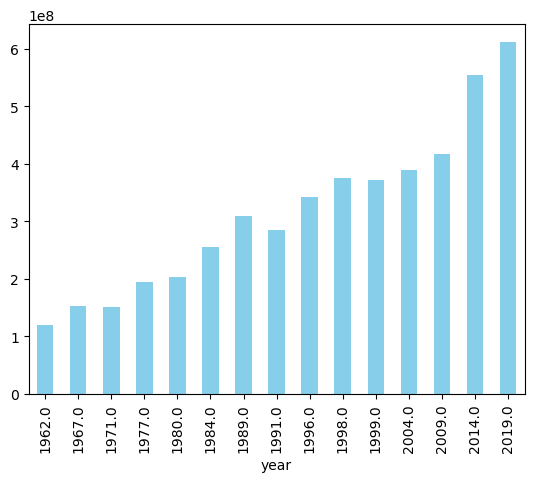

In [57]:
votes_BYyear.plot(kind='bar', color='skyblue')

- The population is increase by year so that the number of votes increses in each election year

<Axes: xlabel='year'>

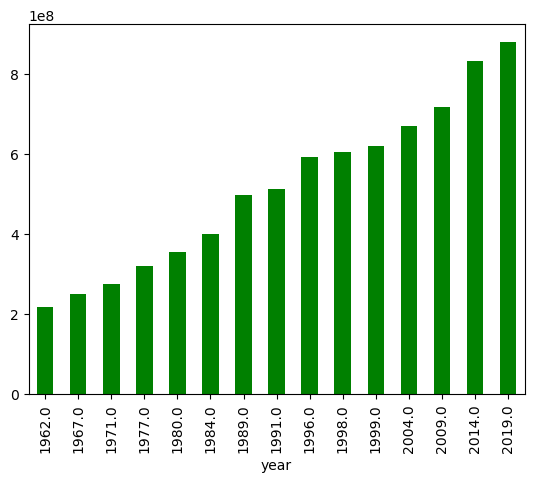

In [61]:
electors_BYyear.plot(kind='bar', color='green')

- The voters increses in each election year

In [64]:
ind.corr(numeric_only=True)

,electors,votes,Turnout,margin%,year
electors,1.000000,0.896089,0.081851,-0.144507,0.859938
votes,0.896089,1.000000,0.479201,-0.151585,0.836564
Turnout,0.081851,0.479201,1.000000,-0.092733,0.216107
margin%,-0.144507,-0.151585,-0.092733,1.000000,-0.162216
year,0.859938,0.836564,0.216107,-0.162216,1.000000


- Almost strong positive correlation is seems b/m votes and year and also electors and year
- There is almost strong positive correlation b/w votes and electors(Eligble voters)
- week positive corraltion seems b/q turnout and votes.turnout is the percentage of eligible voters who actually participate in an election by casting their votes.

# Conclusion

- **Seat Reservations**: The majority of seats in the Indian Parliament are reserved for the General category, followed by SC and ST categories. General category seats constitute the highest proportion, indicating their dominance in parliamentary representation.

- **Candidate Analysis**: Atal Bihari Vajpayee emerges as the most nominated candidate in Indian Parliament history, contesting in multiple constituencies and elections, primarily under the General category. He has represented various parties over the years, with Bharatiya Janata Party being the most frequent.

- **Party Performance**: Indian National Congress has historically secured the highest number of seats, followed closely by Bharatiya Janata Party. Together, they hold a significant portion of parliamentary representation, showcasing their enduring influence in Indian politics.

- **State Representation**: Uttar Pradesh consistently contributes the highest number of parliamentary constituency seats, reflecting its significance in Indian electoral politics.

- **Margin of Victory**: Purno Agitok Sangma holds the record for the highest margin of victory, winning with a substantial 58% margin in 1998. His victory underscores the importance of strong candidate appeal and electoral strategy.

- **Voter Turnout and Electorate**: Both voter turnout and the total number of electors have shown an increasing trend over the years, indicating growing political participation and engagement among the electorate.

- **Correlation Analysis**: There is a strong positive correlation between the number of votes cast and both the election year and the number of eligible voters. Additionally, a weak positive correlation exists between voter turnout and the number of votes cast.